<a href="https://colab.research.google.com/github/u3228058/CapstoneGroupProject/blob/main/EarthquakeDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#Read Datasets
de = pd.read_csv('/content/Deadliest_earthquakes_by_yearupdated_Real_Ver.csv')

In [ ]:
#First 5 rows 
de.head()

,Event,Magnitude,Depth (km),Notes,Date,MMI
0,0.000000,0.641026,0.137405,0.566265,0.547945,1.000000
1,0.012048,0.615385,1.000000,0.000000,0.054795,0.666667
2,0.024096,0.128205,0.251908,0.084337,0.095890,0.333333
3,0.036145,0.435897,0.061069,0.337349,0.369863,0.500000
4,0.048193,0.615385,0.137405,0.795181,0.589041,0.833333


In [ ]:
#Last 5 rows
de.tail()

,Event,Magnitude,Depth (km),Notes,Date,MMI
79,0.927711,0.282051,0.061069,0.614458,0.534247,0.333333
80,0.939759,0.435897,0.145038,0.481928,0.739726,0.333333
81,0.951807,0.487179,0.061069,0.518072,0.219178,0.500000
82,0.987952,0.179487,0.061069,0.469880,0.397260,0.333333
83,0.963855,0.641026,0.061069,0.433735,0.876712,1.000000


In [ ]:
#How many entries
de.shape 

(84, 6)

In [ ]:

de.columns 

Index(['Event', 'Magnitude', 'Depth (km)', 'Notes', 'Date', 'MMI'], dtype='object')

In [ ]:
de.nunique()

Event         84
Magnitude     30
Depth (km)    38
Notes         84
Date          74
MMI            7
dtype: int64

In [ ]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Event       84 non-null     object 
 1   Magnitude   84 non-null     float64
 2   Location    84 non-null     object 
 3   Depth (km)  84 non-null     float64
 4   MMI         83 non-null     float64
 5   Year        84 non-null     int64  
 6   Notes       84 non-null     object 
 7   Date        84 non-null     object 
dtypes: float64(3), int64(1), object(4)
memory usage: 5.4+ KB


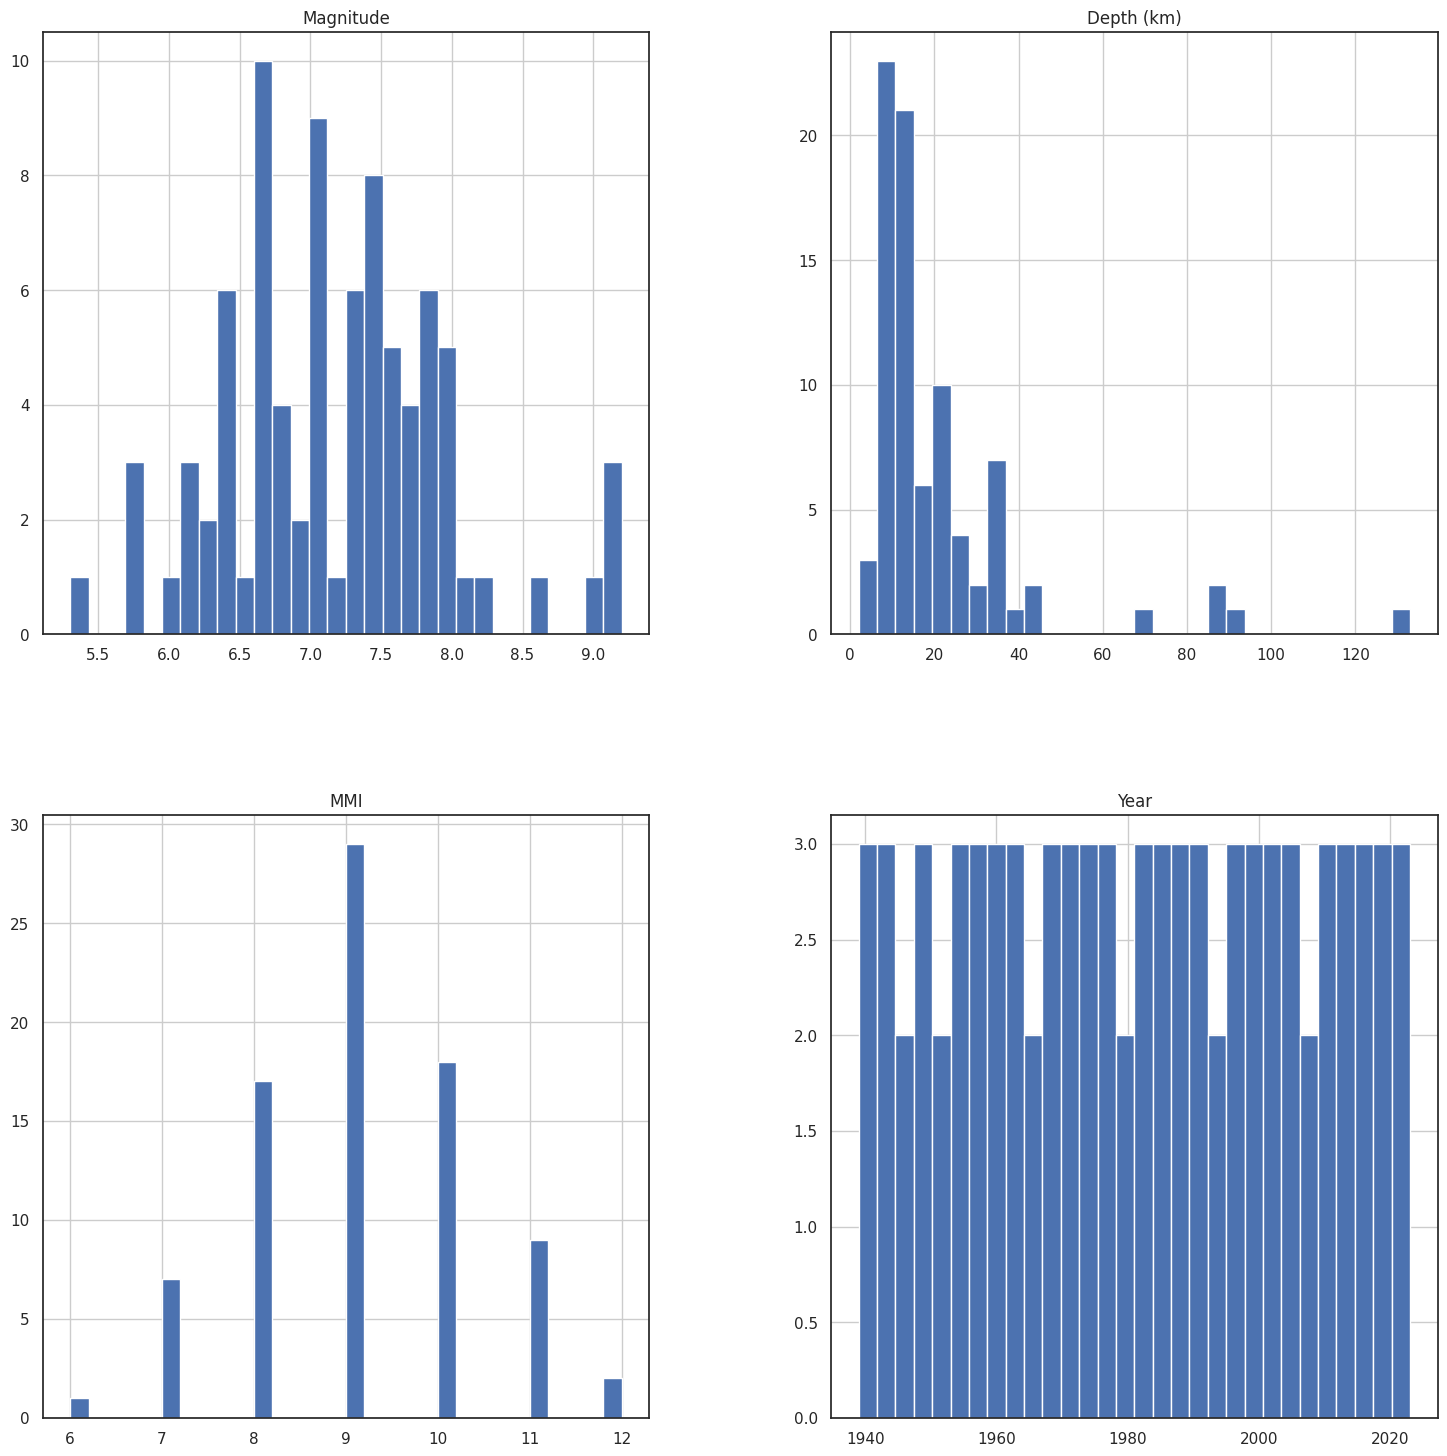

In [ ]:
#3. Visualising data distribution in detail
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
de.hist(ax=ax,bins =30)
plt.show()

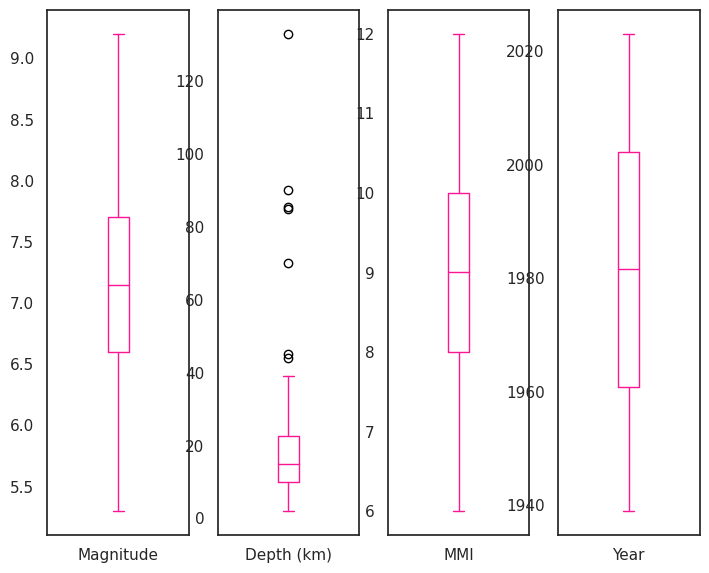

In [ ]:
de.plot(kind='box', subplots=True,layout=(2,7),sharex=False,sharey=False, figsize=(15, 15), color='deeppink');

In [ ]:
continous_features = ['Magnitude','Depth (km)','MMI','Year']
def outliers(de_out, drop = False):
    for each_feature in de_out.columns:
     feature_data = de_out[each_feature]
    Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
    Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
    IQR = Q3-Q1 #Interquartile Range
    outlier_step = IQR * 1.5 #That's we were talking about above
    outliers = feature_data[~((feature_data >= Q1 -outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
    if not drop:
      print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
    if drop:
      de.drop(outliers, inplace = True, errors = 'ignore')
      print('Outliers from {} feature removed'.format(each_feature))
outliers(de[continous_features])

KeyError: ignored

In [ ]:
outliers(de[continous_features], drop = True)

Outliers from Year feature removed


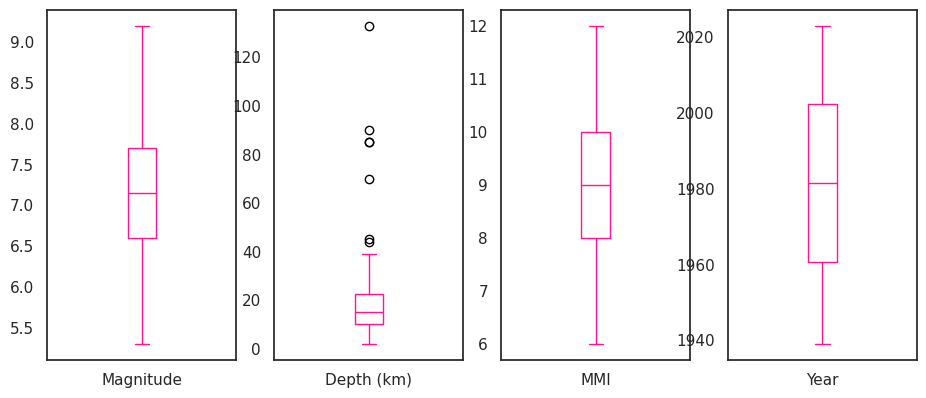

In [ ]:
de.plot(kind='box', subplots=True,
layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');

In [ ]:
de.shape

(84, 8)

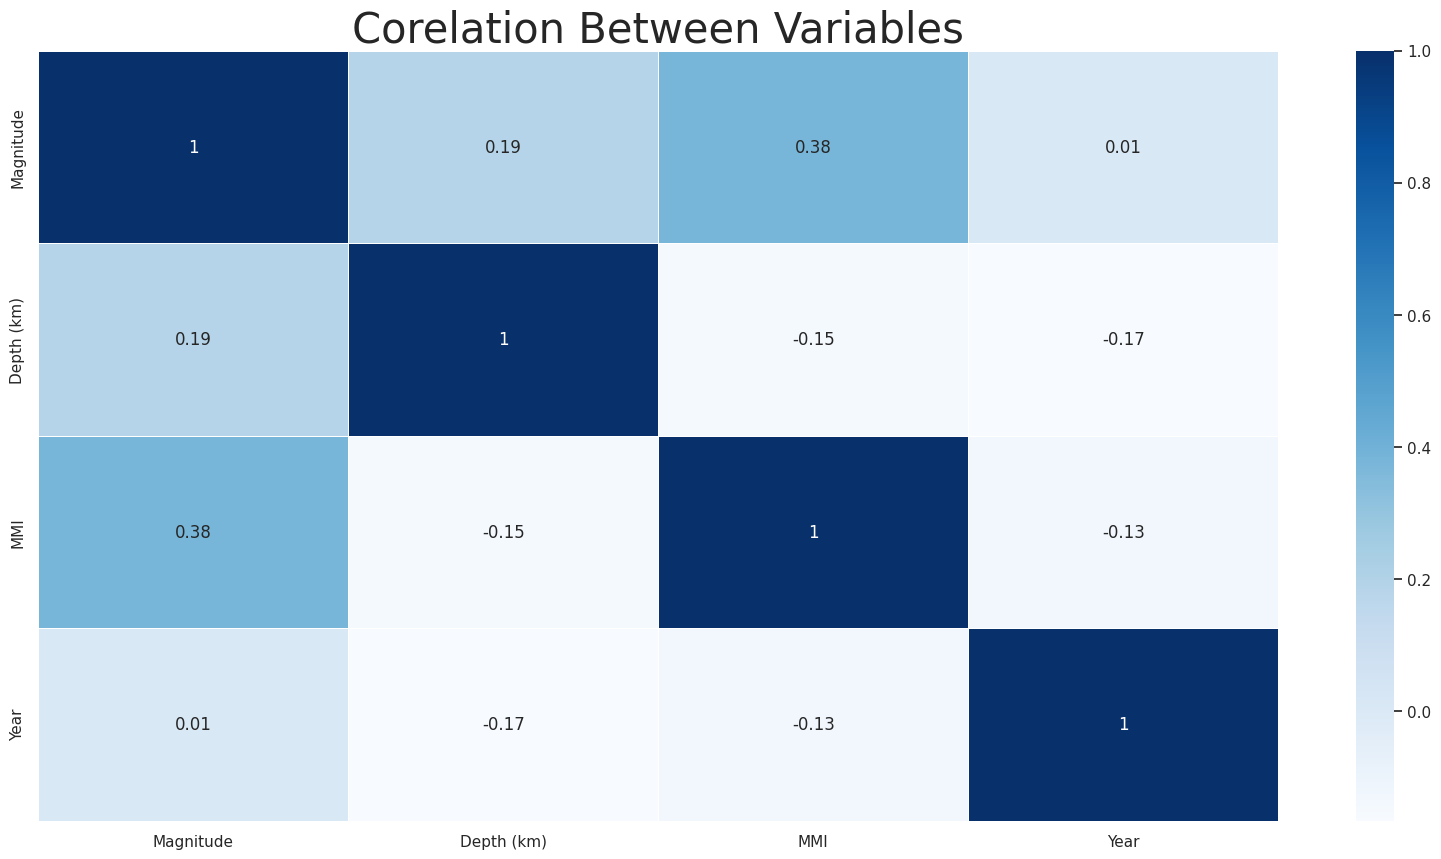

In [ ]:
#check correlation between variables
sns.set(style="white")
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(de.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

7.8    6
7.3    6
6.6    6
6.4    6
7.6    5
7.0    5
7.4    5
6.7    4
7.1    4
7.7    4
6.8    4
7.5    3
8.0    3
5.8    2
6.2    2
9.1    2
7.9    2
6.9    2
6.3    2
7.2    1
5.3    1
5.7    1
9.0    1
8.2    1
6.5    1
8.1    1
8.6    1
9.2    1
6.1    1
6.0    1
Name: Magnitude, dtype: int64


ValueError: ignored

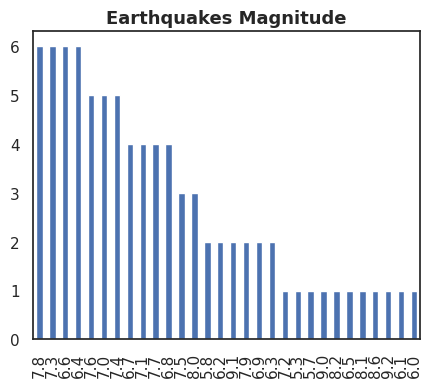

In [ ]:
#checking target value distribution
print(de.Magnitude.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["5.3","9.2"]
ax = de.Magnitude.value_counts().plot(kind='bar')
ax.set_title("Earthquakes Magnitude", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
# To calculate the percentage
totals = []
for i in ax.patches:
  totals.append(i.get_height())
  total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.09, i.get_height()-50, \
    str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
    color='white', weight = 'bold')
plt.tight_layout()

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.6 MB 22.1 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 48.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345980 sha256=4244839c628be395aff64cd9af4b76bafb553fab0c1deb235838c99625e94776
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [ ]:
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#decoded in to common object data types
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
for col in de:
  if de[col].dtype =='object':
    de[col]=OrdinalEncoder().fit_transform(de[col].values.reshape(-1,1))
de

,Event,Magnitude,Depth (km),Notes,Date,MMI
0,0.000000,0.641026,0.137405,0.566265,0.547945,1.000000
1,0.012048,0.615385,1.000000,0.000000,0.054795,0.666667
2,0.024096,0.128205,0.251908,0.084337,0.095890,0.333333
3,0.036145,0.435897,0.061069,0.337349,0.369863,0.500000
4,0.048193,0.615385,0.137405,0.795181,0.589041,0.833333
...,...,...,...,...,...,...
79,0.927711,0.282051,0.061069,0.614458,0.534247,0.333333
80,0.939759,0.435897,0.145038,0.481928,0.739726,0.333333
81,0.951807,0.487179,0.061069,0.518072,0.219178,0.500000
82,0.987952,0.179487,0.061069,0.469880,0.397260,0.333333


In [ ]:
class_label =de['MMI']
de = de.drop(['MMI'], axis =1)
de = (de-de.min())/(de.max()-de.min())
de['MMI']=class_label
de

,Event,Magnitude,Depth (km),Notes,Date,MMI
0,0.000000,0.641026,0.137405,0.566265,0.547945,1.000000
1,0.012048,0.615385,1.000000,0.000000,0.054795,0.666667
2,0.024096,0.128205,0.251908,0.084337,0.095890,0.333333
3,0.036145,0.435897,0.061069,0.337349,0.369863,0.500000
4,0.048193,0.615385,0.137405,0.795181,0.589041,0.833333
...,...,...,...,...,...,...
79,0.927711,0.282051,0.061069,0.614458,0.534247,0.333333
80,0.939759,0.435897,0.145038,0.481928,0.739726,0.333333
81,0.951807,0.487179,0.061069,0.518072,0.219178,0.500000
82,0.987952,0.179487,0.061069,0.469880,0.397260,0.333333


In [ ]:
Deadliestearthquakesbyyearupdated_data = de.copy()
le = preprocessing.LabelEncoder()
Event = le.fit_transform(list(Deadliestearthquakesbyyearupdated_data["Event"]))
Magnitude = le.fit_transform(list(Deadliestearthquakesbyyearupdated_data["Magnitude"]))
Notes = le.fit_transform(list(Deadliestearthquakesbyyearupdated_data["Notes"]))
Date = le.fit_transform(list(Deadliestearthquakesbyyearupdated_data["Date"]))
MMI = le.fit_transform(list(Deadliestearthquakesbyyearupdated_data["MMI"]))


NameError: ignored

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
x = list(zip(Event,Magnitude,Notes,Date))
y = list(MMI)
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
np.shape(x_train), np.shape(x_test)

((67, 4), (17, 4))

In [ ]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)


Performance on Training set
NB: 0.283516 (0.072110)

SVM: 0.327473 (0.054348)

GBM: 0.223077 (0.042218)

RF: 0.179121 (0.036047)



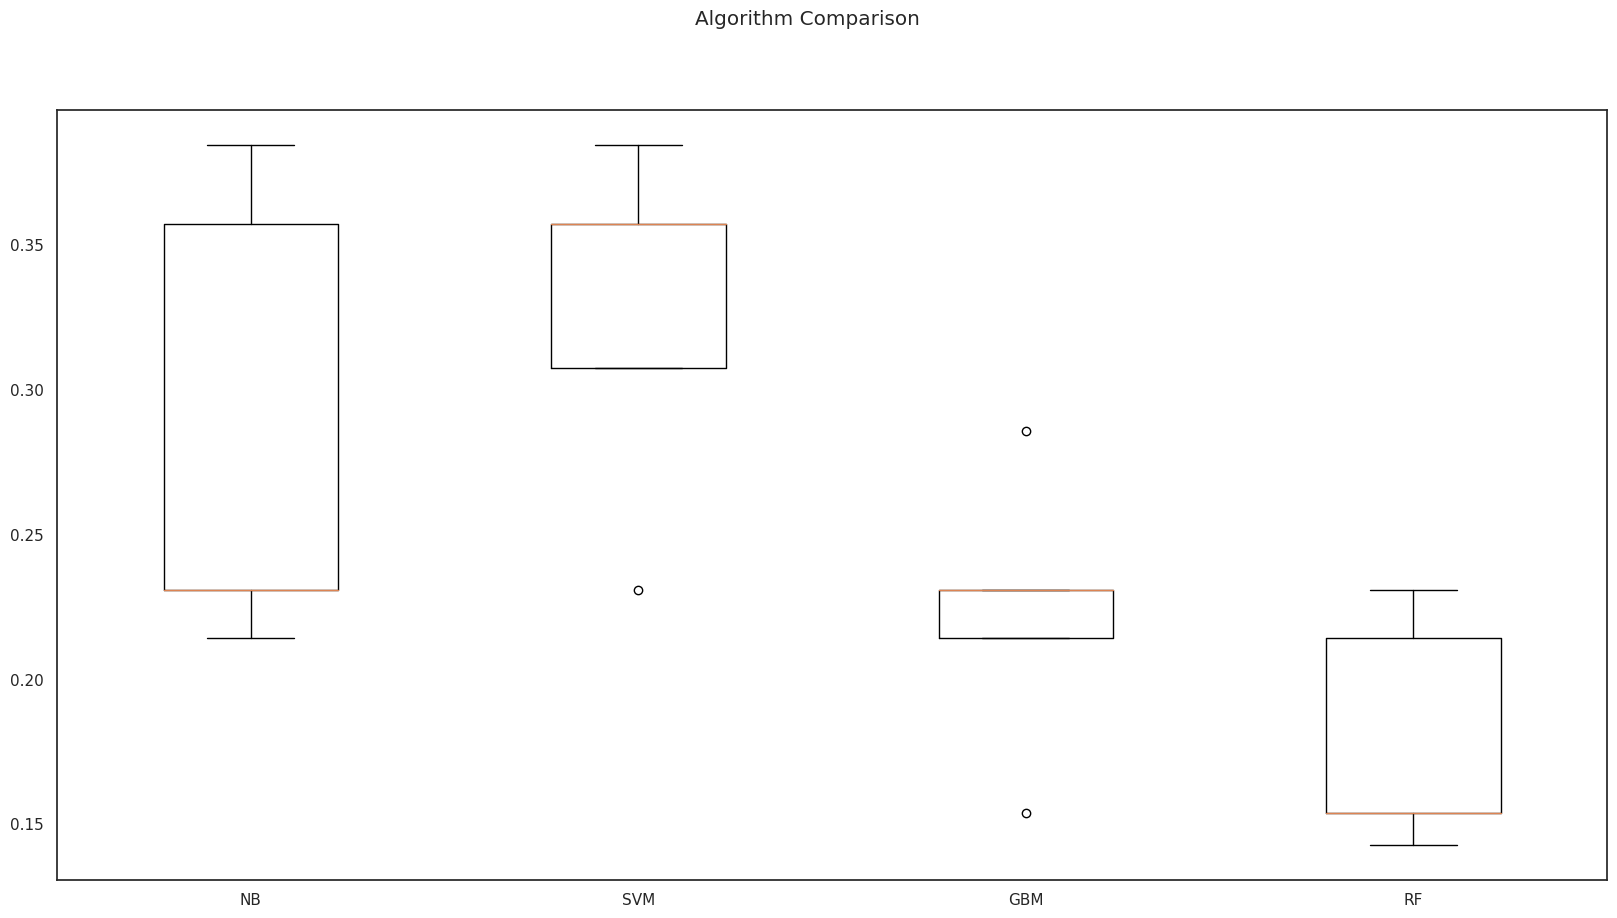

In [ ]:
# Compare Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
best_model = svm
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))

Best Model Accuracy Score on Test Set: 0.29411764705882354


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.31      1.00      0.48         5
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.29        17
   macro avg       0.05      0.17      0.08        17
weighted avg       0.09      0.29      0.14        17



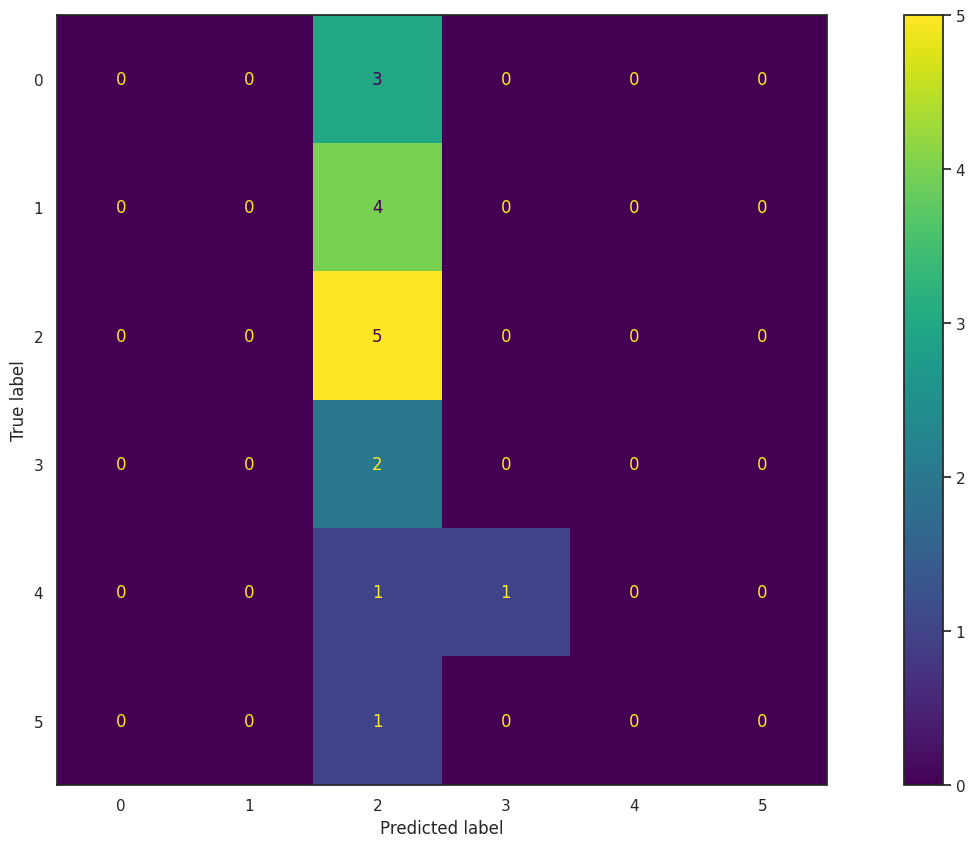

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

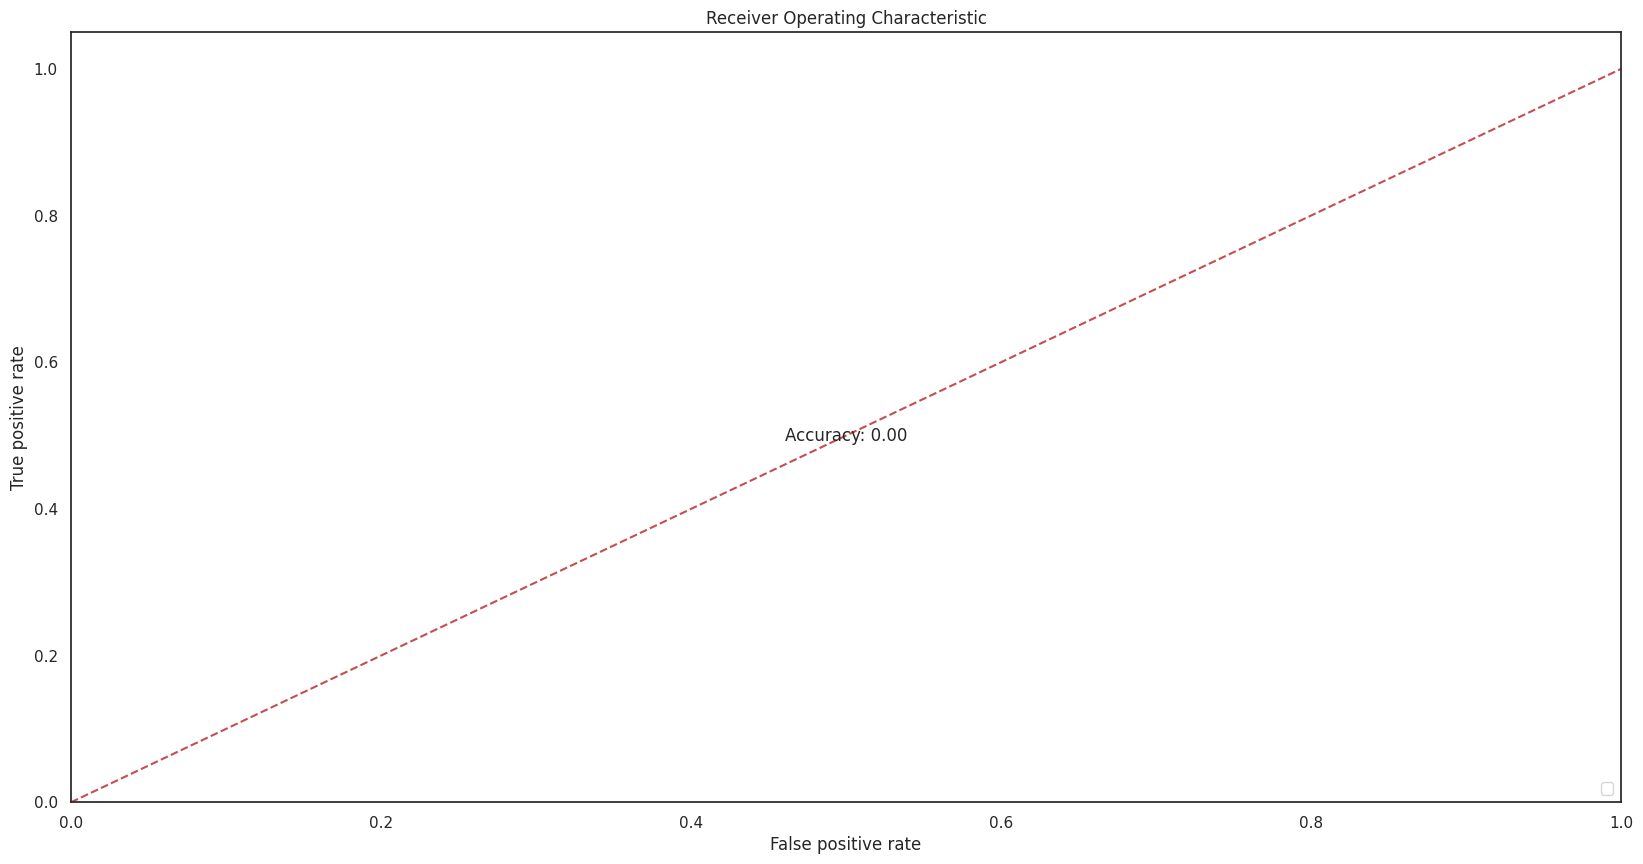

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

best_model = RandomForestClassifier()
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

plt.figure()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.text(0.5, 0.5, 'Accuracy: {:.2f}'.format(accuracy), ha='center', va='center', fontsize=12)
plt.savefig('LOC_ROC.png')
plt.show()




In [ ]:
#Model Evaluation Metric 4-prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)

Predicted:  4 Actual:  5 Data:  (64, 19, 57, 71)
Predicted:  3 Actual:  4 Data:  (40, 16, 65, 5)
Predicted:  3 Actual:  2 Data:  (52, 21, 44, 10)
Predicted:  1 Actual:  4 Data:  (20, 2, 82, 73)
Predicted:  3 Actual:  2 Data:  (30, 22, 83, 58)
Predicted:  4 Actual:  3 Data:  (54, 11, 37, 65)
Predicted:  4 Actual:  1 Data:  (61, 17, 5, 52)
Predicted:  4 Actual:  5 Data:  (12, 27, 64, 63)
Predicted:  2 Actual:  3 Data:  (32, 9, 79, 1)
Predicted:  3 Actual:  1 Data:  (17, 10, 6, 14)
Predicted:  1 Actual:  7 Data:  (11, 8, 4, 67)
Predicted:  4 Actual:  2 Data:  (15, 17, 50, 57)
Predicted:  4 Actual:  3 Data:  (51, 11, 72, 28)
Predicted:  3 Actual:  2 Data:  (2, 2, 7, 7)
Predicted:  3 Actual:  1 Data:  (18, 10, 16, 20)
Predicted:  4 Actual:  3 Data:  (13, 16, 3, 25)
Predicted:  2 Actual:  3 Data:  (62, 9, 25, 36)


In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(de,title="Heart Disease EDA",
html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]